In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/FP
!ls

/content/drive/MyDrive/Colab Notebooks/FP
'Bản sao của Customer Segmentation.ipynb'   Mall_Customers.csv


In [ ]:
pip install kneed

In [ ]:
import numpy as np
from numpy import arange
from matplotlib import pyplot
import pandas as pd
from pandas import read_csv
from pandas import set_option
# from pandas.tools.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import plotly as py
from kneed import KneeLocator
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder,normalize
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df_new = pd.read_csv('Mall_Customers.csv')

In [ ]:
print(df_new.shape)

(200, 5)


In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df_new.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
#df_new = dataset.drop(['CustomerID'], axis = 1)
df_new['Gender'].replace(['Male', 'Female'],[1, 0], inplace=True)
df_new

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


In [ ]:
set_option('display.precision', 3)
print(df_new.describe())

       CustomerID   Gender      Age  Annual Income (k$)  \
count     200.000  200.000  200.000             200.000   
mean      100.500    0.440   38.850              60.560   
std        57.879    0.498   13.969              26.265   
min         1.000    0.000   18.000              15.000   
25%        50.750    0.000   28.750              41.500   
50%       100.500    0.000   36.000              61.500   
75%       150.250    1.000   49.000              78.000   
max       200.000    1.000   70.000             137.000   

       Spending Score (1-100)  
count                 200.000  
mean                   50.200  
std                    25.824  
min                     1.000  
25%                    34.750  
50%                    50.000  
75%                    73.000  
max                    99.000  


In [ ]:
dataset = df_new.drop(['CustomerID'], axis = 1)

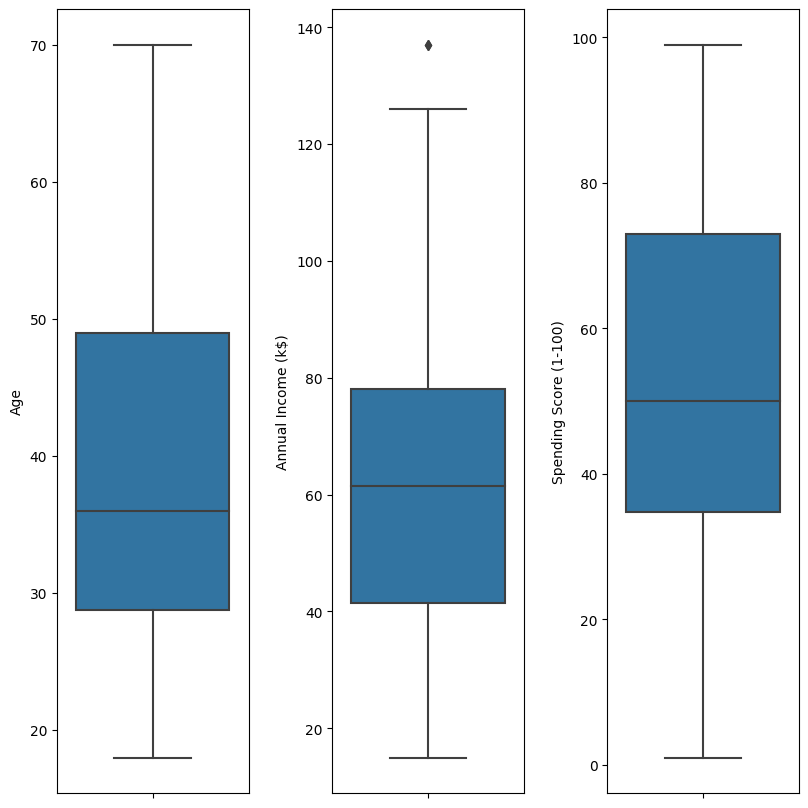

In [ ]:
fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(8, 8))
index = 0
axs = axs.flatten()
for k in ["Age", "Annual Income (k$)", "Spending Score (1-100)"]:
    sns.boxplot(y=k, data=dataset, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=2, h_pad=1)

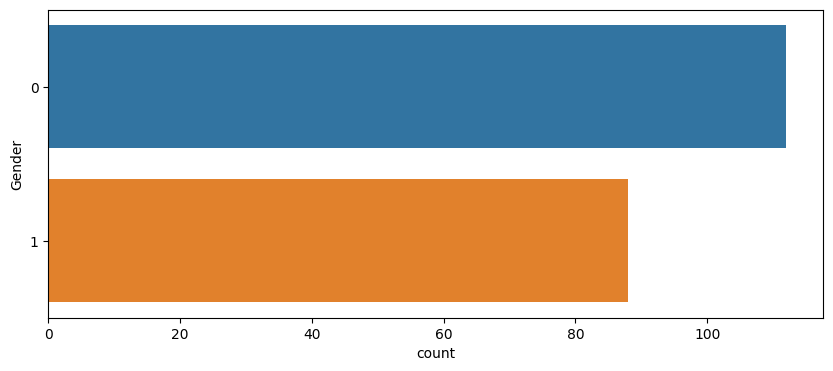

In [ ]:
plt.figure(1, figsize = (10, 4))
sns.countplot(y = "Gender", data = dataset)
plt.show()

In [ ]:
for k, v in (df_new.drop(['Gender','CustomerID'], axis = 1)).items():
  q1 = v.quantile(0.25)
  q3 = v.quantile(0.75)
  irq = q3 - q1
  v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
  perc = np.shape(v_col)[0] * 100.0 / np.shape(df_new)[0]
  print("Column %s outliers = %.2f%%" % (k, perc))

Column Age outliers = 0.00%
Column Annual Income (k$) outliers = 1.00%
Column Spending Score (1-100) outliers = 0.00%


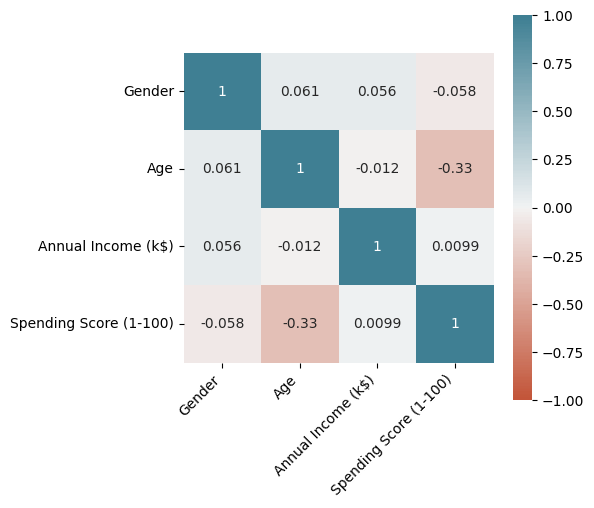

In [ ]:
pd.set_option('display.precision', 2)
cor = dataset.corr(method='pearson')


fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(
    cor,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    ax=ax,
    annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

There is no high correlation between features.

In [ ]:
for k, v in (df_new.drop(['Gender','CustomerID'], axis = 1)).items():
  q1 = v.quantile(0.25)
  q3 = v.quantile(0.75)
  irq = q3 - q1
  v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
  perc = np.shape(v_col)[0] * 100.0 / np.shape(df_new)[0]
  print("Column %s outliers = %.2f%%" % (k, perc))

Column Age outliers = 0.00%
Column Annual Income (k$) outliers = 1.00%
Column Spending Score (1-100) outliers = 0.00%


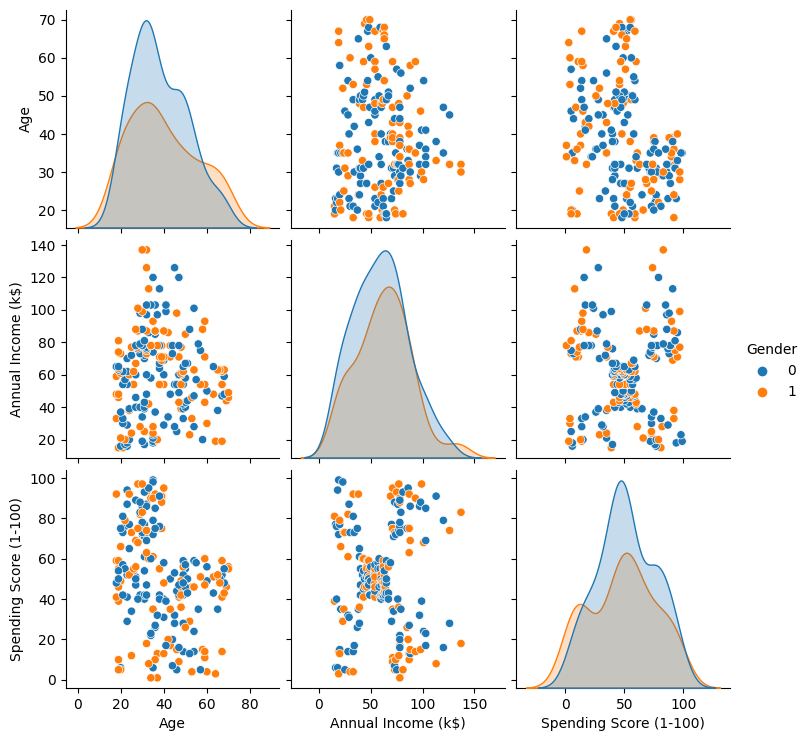

In [ ]:
sns.pairplot(dataset, hue= 'Gender')

<ipython-input-106-47d5a69ee693>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_new[i], bins = 20)
<ipython-input-106-47d5a69ee693>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_new[i], bins = 20)
<ipython-input-106-47d5a69ee693>:8: UserWarning: 

`distplot` is a deprecated function a

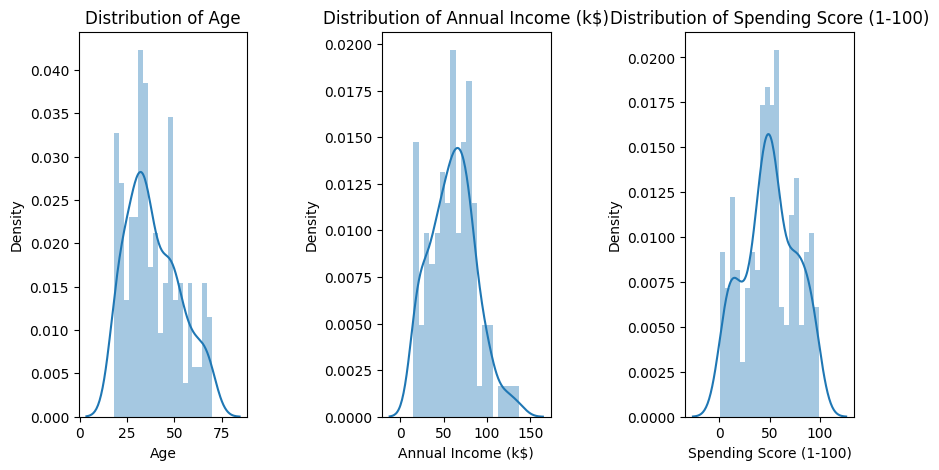

In [ ]:
plt.figure(1, figsize=(10, 5))
n = 0

for i in ["Age", "Annual Income (k$)", "Spending Score (1-100)"]:
    n += 1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace = 2, wspace = 0.8)
    sns.distplot(df_new[i], bins = 20)
    plt.title("Distribution of {}".format(i))
plt.show()

In [ ]:
# scaler = StandardScaler()
# scaler.fit(df_new)
# df = pd.DataFrame(scaler.transform(df_new), columns=df_new.columns)

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()
column_sels = ["Gender","Age", "Annual Income (k$)", "Spending Score (1-100)"]
x = df_new.loc[:,column_sels]
df = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=column_sels)

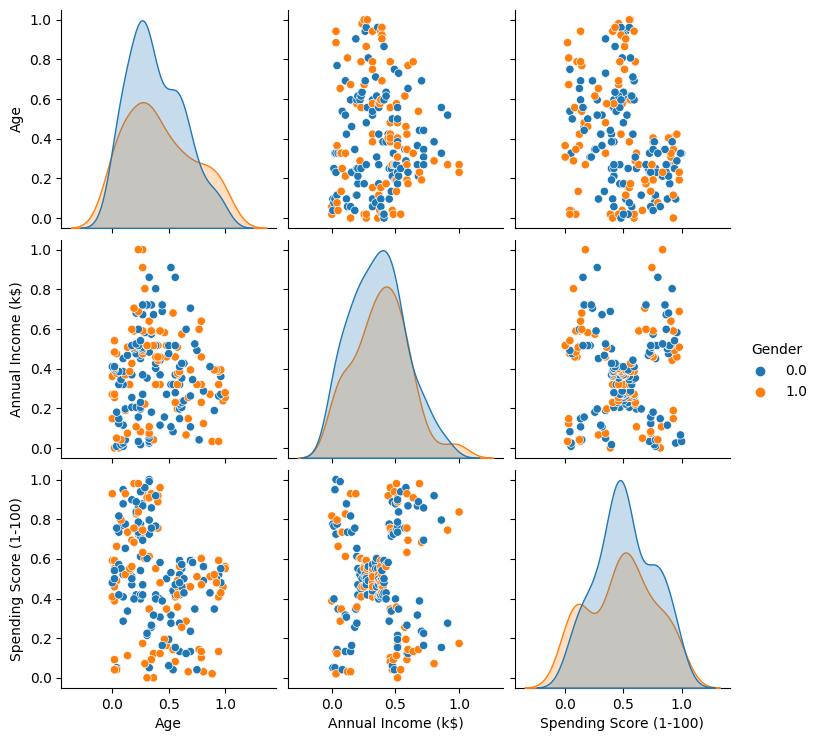

In [ ]:
sns.pairplot(df, hue= 'Gender')

<ipython-input-110-b657f0059d04>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], bins = 20)
<ipython-input-110-b657f0059d04>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], bins = 20)
<ipython-input-110-b657f0059d04>:8: UserWarning: 

`distplot` is a deprecated function and will 

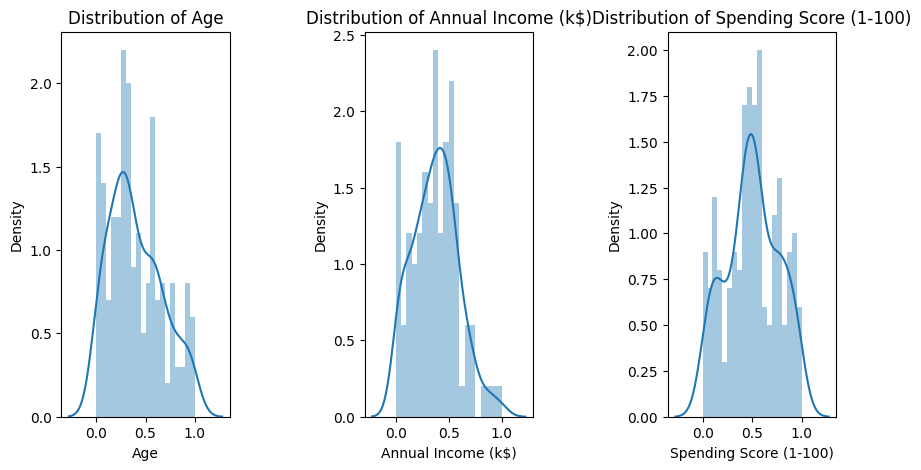

In [ ]:
plt.figure(1, figsize=(10, 5))
n = 0

for i in ["Age", "Annual Income (k$)", "Spending Score (1-100)"]:
    n += 1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace = 2, wspace = 0.8)
    sns.distplot(df[i], bins = 20)
    plt.title(f"Distribution of {i}")
plt.show()

### Chose number of cluster base on Elbow method

In [ ]:
X = df[['Age' , 'Annual Income (k$)' ,'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
  kmeans = KMeans(n_clusters = n ,init='k-means++', random_state=42)
  kmeans.fit_predict(X)
  inertia.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

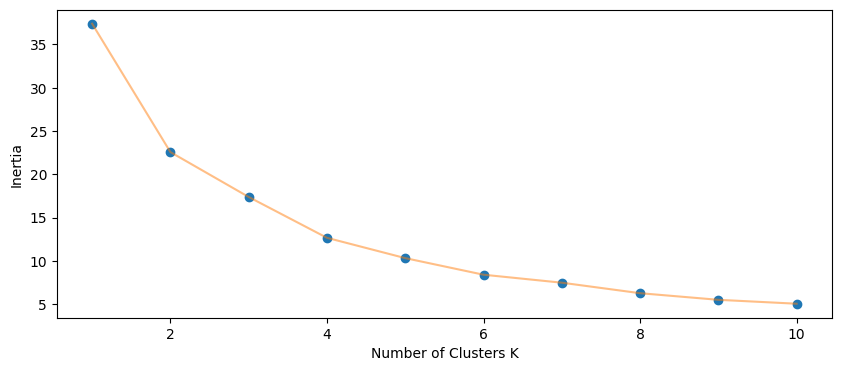

In [ ]:
plt.figure(1 , figsize = (10 ,4))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters K')
plt.ylabel('Inertia')
plt.show()

In [ ]:
kl = KneeLocator( range(1, 11), inertia, curve="convex", direction="decreasing")
optimal_n_clusters = kl.elbow
print(f"The optimal number of clusters is {optimal_n_clusters}.")

The optimal number of clusters is 4.


In [ ]:
kmeans = KMeans(n_clusters = 4 ,init='k-means++', random_state=42)
y_clusters = kmeans.fit_predict(X)
cluster_labels = kmeans.labels_
centroid = kmeans.cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
cluster_labels

array([0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0,
       2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0,
       0, 2, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2,
       2, 0, 1, 0, 0, 0, 2, 2, 2, 2, 0, 1, 3, 3, 1, 3, 1, 3, 2, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3], dtype=int32)

In [ ]:
print(centroid)

[[0.14304993 0.20491803 0.60508414]
 [0.41093117 0.58606557 0.1895811 ]
 [0.69201183 0.26809584 0.39764521]
 [0.28605769 0.58278689 0.82168367]]


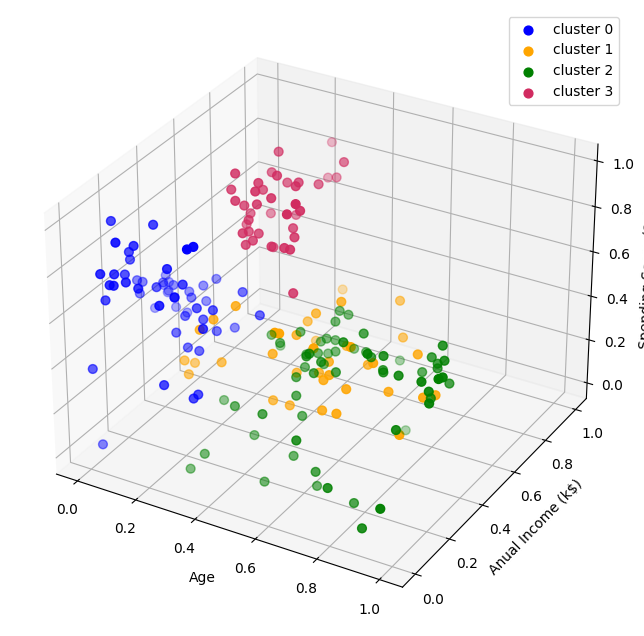

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[cluster_labels == 0,0],X[cluster_labels == 0,1],X[cluster_labels == 0,2], s = 40 , color = 'blue', label = "cluster 0")
ax.scatter(X[cluster_labels == 1,0],X[cluster_labels == 1,1],X[cluster_labels == 1,2], s = 40 , color = 'orange', label = "cluster 1")
ax.scatter(X[cluster_labels == 2,0],X[cluster_labels == 2,1],X[cluster_labels == 2,2], s = 40 , color = 'green', label = "cluster 2")
ax.scatter(X[cluster_labels == 3,0],X[cluster_labels == 3,1],X[cluster_labels == 3,2], s = 40 , color = '#D12B60', label = "cluster 3")

ax.set_xlabel('Age')
ax.set_ylabel('Anual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.legend()
plt.show()

In [ ]:
df_new['label'] = cluster_labels
for i in range(0,4):

  cluster_i = df_new[df_new["label"]==i]
  print(f'Number of customer in {i+1} th group is ',len(cluster_i))
  print('Their Customer ID are', cluster_i["CustomerID"].values)
  print("\n")

Number of customer in 1 th group is  57
Their Customer ID are [  1   2   3   4   5   6   8  10  12  14  16  17  18  20  21  22  24  26
  28  30  32  34  36  38  40  42  44  46  48  49  50  52  53  59  62  66
  69  70  76  79  82  85  88  89  92  95  96  98 100 101 104 106 112 114
 115 116 121]


Number of customer in 2 th group is  38
Their Customer ID are [113 122 125 127 131 133 135 137 139 141 143 145 147 149 151 153 155 157
 159 163 165 167 169 171 173 175 177 179 181 183 185 187 189 191 193 195
 197 199]


Number of customer in 3 th group is  65
Their Customer ID are [  7   9  11  13  15  19  23  25  27  29  31  33  35  37  39  41  43  45
  47  51  54  55  56  57  58  60  61  63  64  65  67  68  71  72  73  74
  75  77  78  80  81  83  84  86  87  90  91  93  94  97  99 102 103 105
 107 108 109 110 111 117 118 119 120 129 161]


Number of customer in 4 th group is  40
Their Customer ID are [123 124 126 128 130 132 134 136 138 140 142 144 146 148 150 152 154 156
 158 160 162 164 16

### Chose number of cluster base on Silhouette Analysis

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

The optimal number of clusters is: 10


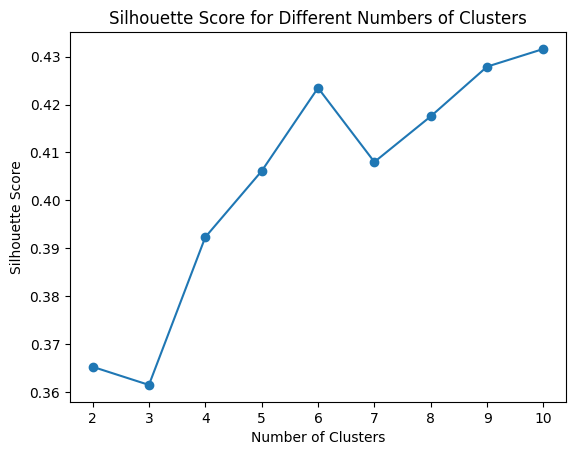

In [ ]:

X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].values

silhouette_scores = []

for n in range(2, 11):
    kmeans = KMeans(n_clusters=n, init='k-means++', random_state=42)
    kmeans.fit_predict(X)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Find the optimal number of clusters with the highest silhouette score
optimal_n_clusters = np.argmax(silhouette_scores) + 2  # Adding 2 because the loop starts from n=2

print(f"The optimal number of clusters is: {optimal_n_clusters}")


plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.show()


In [ ]:
kmeans = KMeans(n_clusters = 10,init='k-means++', random_state=42)
y_clusters = kmeans.fit_predict(X)
cluster_labels = kmeans.labels_
centroid = kmeans.cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
centroid

array([[0.56108597, 0.33365477, 0.46818727],
       [0.12980769, 0.33427254, 0.49489796],
       [0.28254438, 0.58638083, 0.82783883],
       [0.19230769, 0.51844262, 0.07397959],
       [0.72863248, 0.08652095, 0.10544218],
       [0.13986014, 0.08792846, 0.79962894],
       [0.90096154, 0.31270492, 0.49846939],
       [0.41346154, 0.73497268, 0.20748299],
       [0.30944056, 0.07004471, 0.24953618],
       [0.64497041, 0.54413619, 0.15620094]])

In [ ]:
cluster_labels

array([8, 5, 8, 5, 8, 5, 8, 5, 4, 5, 4, 5, 4, 5, 8, 5, 8, 5, 4, 5, 8, 5,
       4, 5, 4, 5, 8, 5, 8, 5, 4, 5, 4, 5, 4, 5, 8, 5, 8, 5, 6, 5, 0, 1,
       0, 5, 0, 1, 1, 1, 0, 1, 1, 6, 0, 0, 0, 6, 1, 0, 6, 1, 6, 0, 6, 1,
       0, 6, 1, 1, 6, 0, 6, 6, 6, 1, 0, 0, 1, 0, 6, 0, 6, 0, 1, 0, 0, 1,
       1, 0, 6, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 6, 1, 0, 1, 6, 0, 6, 6,
       6, 1, 0, 1, 1, 1, 6, 0, 0, 0, 1, 0, 0, 2, 1, 2, 0, 2, 9, 2, 9, 2,
       1, 2, 3, 2, 9, 2, 3, 2, 9, 2, 1, 2, 3, 2, 0, 2, 3, 2, 9, 2, 9, 2,
       9, 2, 3, 2, 3, 2, 9, 2, 3, 2, 9, 2, 7, 2, 7, 2, 7, 2, 3, 2, 9, 2,
       9, 2, 9, 2, 7, 2, 7, 2, 7, 2, 9, 2, 7, 2, 7, 2, 7, 2, 7, 2, 7, 2,
       7, 2], dtype=int32)

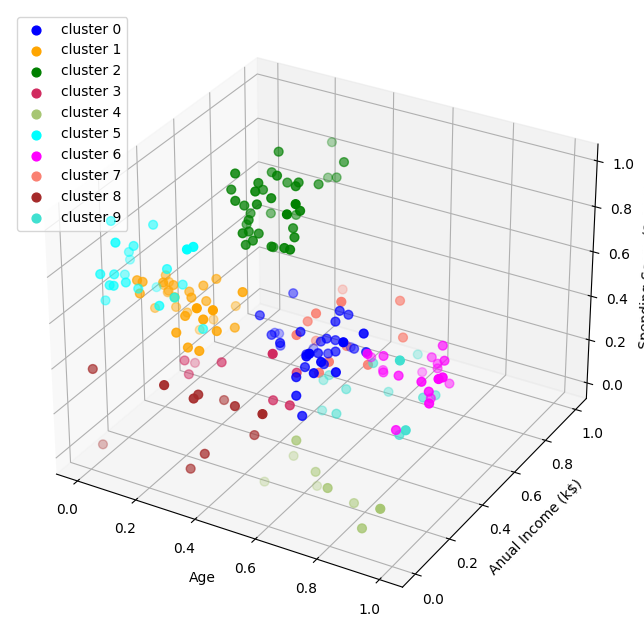

In [ ]:
fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[cluster_labels == 0,0],X[cluster_labels == 0,1],X[cluster_labels == 0,2], s = 40 , color = 'blue', label = "cluster 0")
ax.scatter(X[cluster_labels == 1,0],X[cluster_labels == 1,1],X[cluster_labels == 1,2], s = 40 , color = 'orange', label = "cluster 1")
ax.scatter(X[cluster_labels == 2,0],X[cluster_labels == 2,1],X[cluster_labels == 2,2], s = 40 , color = 'green', label = "cluster 2")
ax.scatter(X[cluster_labels == 3,0],X[cluster_labels == 3,1],X[cluster_labels == 3,2], s = 40 , color = '#D12B60', label = "cluster 3")
ax.scatter(X[cluster_labels == 4,0],X[cluster_labels == 4,1],X[cluster_labels == 4,2], s = 40 , color = '#A7C673', label = "cluster 4")
ax.scatter(X[cluster_labels == 5,0],X[cluster_labels == 5,1],X[cluster_labels == 5,2], s = 40 , color = 'cyan', label = "cluster 5")
ax.scatter(X[cluster_labels == 6,0],X[cluster_labels == 6,1],X[cluster_labels == 6,2], s = 40 , color = 'magenta', label = "cluster 6")
ax.scatter(X[cluster_labels == 7,0],X[cluster_labels == 7,1],X[cluster_labels == 7,2], s = 40 , color = '#FA8072', label = "cluster 7")
ax.scatter(X[cluster_labels == 8,0],X[cluster_labels == 8,1],X[cluster_labels == 8,2], s = 40 , color = '#A52A2A', label = "cluster 8")
ax.scatter(X[cluster_labels == 9,0],X[cluster_labels == 9,1],X[cluster_labels == 9,2], s = 40 , color = '#40E0D0', label = "cluster 9")
# ax.view_init(35, 185)
ax.set_xlabel('Age')
ax.set_ylabel('Anual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.legend(loc =  "upper left" )
plt.show()

In [ ]:
df_new['label'] = cluster_labels

In [ ]:
df_new

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,1,19,15,39,8
1,2,1,21,15,81,5
2,3,0,20,16,6,8
3,4,0,23,16,77,5
4,5,0,31,17,40,8
...,...,...,...,...,...,...
195,196,0,35,120,79,2
196,197,0,45,126,28,7
197,198,1,32,126,74,2
198,199,1,32,137,18,7


In [ ]:
for i in range(0,10):
  cluster_i = df_new[df_new["label"]==i]
  print(f'Number of customer in {i+1} th group is ',len(cluster_i))
  print('Their Customer ID are', cluster_i["CustomerID"].values)
  print("\n")

Number of customer in 1 th group is  34
Their Customer ID are [ 43  45  47  51  55  56  57  60  64  67  72  77  78  80  82  84  86  87
  90  93  94  97  99 102 105 108 113 118 119 120 122 123 127 147]


Number of customer in 2 th group is  32
Their Customer ID are [ 44  48  49  50  52  53  59  62  66  69  70  76  79  85  88  89  92  95
  96  98 100 101 104 106 112 114 115 116 121 125 133 143]


Number of customer in 3 th group is  39
Their Customer ID are [124 126 128 130 132 134 136 138 140 142 144 146 148 150 152 154 156 158
 160 162 164 166 168 170 172 174 176 178 180 182 184 186 188 190 192 194
 196 198 200]


Number of customer in 4 th group is  8
Their Customer ID are [135 139 145 149 157 159 163 173]


Number of customer in 5 th group is  9
Their Customer ID are [ 9 11 13 19 23 25 31 33 35]


Number of customer in 6 th group is  22
Their Customer ID are [ 2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 46]


Number of customer in 7 th group is  20
Their Customer ID